In [ ]:
!pip install lazypredict

In [1]:
# from lazypredict.Supervised import LazyRegressor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb

In [2]:
# Load Train dataset
df_train = pd.read_csv('Train.csv')

In [3]:
# Load Test dataset
df_test = pd.read_csv('Test.csv')


In [4]:
df_train.shape

(30557, 82)

In [5]:
df_test.shape

(16136, 77)

In [6]:
df_test.head()

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,...,59.174188,-97.247602,32.730553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,...,40.925873,-96.057265,28.320527,1831.261597,3229.118652,0.031068,-100.278343,41.84708,-95.910744,28.498789


In [7]:
df_test.describe()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,14809.000000,14809.000000,14809.000000,14809.000000,...,11963.000000,11963.000000,11963.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000
mean,14.202076,71.136312,0.005513,8.651834,0.660754,0.113826,0.000098,0.000166,-1.089137,0.293308,...,34.894186,-122.992436,49.048986,945.230960,1766.062448,0.018122,0.587431,14.053838,-71.287981,24.113993
std,9.377060,18.357542,0.003261,8.033144,2.854376,2.914895,0.000084,0.000101,0.616871,0.306695,...,18.808611,76.258227,13.809821,930.249966,1755.875373,0.029822,55.802139,18.085361,87.392331,25.099069
min,0.900000,6.700000,0.000279,-26.628958,-15.837668,-14.043520,-0.000031,0.000000,-3.495448,0.000000,...,0.000000,-179.953644,0.000000,0.000000,0.000000,0.000000,-105.016572,0.000000,-179.924887,0.000000
25%,7.655303,60.000000,0.003401,3.201305,-1.040559,-1.590374,0.000059,0.000127,-1.525122,0.029981,...,18.517603,-166.951551,40.406972,0.000000,0.000000,0.000000,0.000000,0.000000,-163.013042,0.000000
50%,11.600000,74.800003,0.004610,7.482545,0.402638,0.043358,0.000079,0.000154,-1.172175,0.172885,...,36.782582,-158.740565,50.105448,1771.898988,2943.639456,0.003386,0.000000,1.538256,0.000000,21.074167
75%,18.100000,85.500000,0.006598,13.834132,2.167810,1.708833,0.000115,0.000191,-0.721279,0.500543,...,51.485177,-124.569494,59.020340,1863.157119,3424.017252,0.025774,62.156588,27.354263,0.000000,48.395878
max,63.100002,100.000000,0.020180,34.851022,19.889325,16.682952,0.001233,0.001343,5.196880,1.000000,...,66.216644,179.884901,79.647072,1992.809481,6196.581543,0.215117,75.897305,59.984665,179.955138,69.925462


### Count missing values

In [8]:
# Find columns with null values and count the number of null values
null_counts = df_train.isnull().sum()

# Print column names with their number of null values or 0 if there are none
print("Columns with null values and their counts:")
for col in df_train.columns:
    print(f"{col}: {null_counts[col]}")

Columns with null values and their counts:
Place_ID X Date: 0
Date: 0
Place_ID: 0
target: 0
target_min: 0
target_max: 0
target_variance: 0
target_count: 0
precipitable_water_entire_atmosphere: 0
relative_humidity_2m_above_ground: 0
specific_humidity_2m_above_ground: 0
temperature_2m_above_ground: 0
u_component_of_wind_10m_above_ground: 0
v_component_of_wind_10m_above_ground: 0
L3_NO2_NO2_column_number_density: 2189
L3_NO2_NO2_slant_column_number_density: 2189
L3_NO2_absorbing_aerosol_index: 2189
L3_NO2_cloud_fraction: 2189
L3_NO2_sensor_altitude: 2189
L3_NO2_sensor_azimuth_angle: 2190
L3_NO2_sensor_zenith_angle: 2190
L3_NO2_solar_azimuth_angle: 2190
L3_NO2_solar_zenith_angle: 2190
L3_NO2_stratospheric_NO2_column_number_density: 2190
L3_NO2_tropopause_pressure: 2190
L3_NO2_tropospheric_NO2_column_number_density: 8669
L3_O3_O3_column_number_density: 283
L3_O3_O3_effective_temperature: 283
L3_O3_cloud_fraction: 283
L3_O3_sensor_azimuth_angle: 283
L3_O3_sensor_zenith_angle: 283
L3_O3_solar

In [9]:
df_train.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_train.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,18.955228,71.916036,14.594267,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,19.451524,-165.882624,36.693094,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726937,0.000000
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,37.918838,-156.637162,47.445010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,52.270055,-118.453598,57.438181,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


In [11]:
# Find columns with null values and count the number of null values
null_counts = df_test.isnull().sum()

# Print column names with their number of null values or 0 if there are none
print("Columns with null values and their counts:")
for col in df_test.columns:
    print(f"{col}: {null_counts[col]}")

Columns with null values and their counts:
Place_ID X Date: 0
Date: 0
Place_ID: 0
precipitable_water_entire_atmosphere: 0
relative_humidity_2m_above_ground: 0
specific_humidity_2m_above_ground: 0
temperature_2m_above_ground: 0
u_component_of_wind_10m_above_ground: 0
v_component_of_wind_10m_above_ground: 0
L3_NO2_NO2_column_number_density: 1327
L3_NO2_NO2_slant_column_number_density: 1327
L3_NO2_absorbing_aerosol_index: 1327
L3_NO2_cloud_fraction: 1327
L3_NO2_sensor_altitude: 1327
L3_NO2_sensor_azimuth_angle: 1327
L3_NO2_sensor_zenith_angle: 1327
L3_NO2_solar_azimuth_angle: 1327
L3_NO2_solar_zenith_angle: 1327
L3_NO2_stratospheric_NO2_column_number_density: 1327
L3_NO2_tropopause_pressure: 1327
L3_NO2_tropospheric_NO2_column_number_density: 4973
L3_O3_O3_column_number_density: 214
L3_O3_O3_effective_temperature: 214
L3_O3_cloud_fraction: 214
L3_O3_sensor_azimuth_angle: 214
L3_O3_sensor_zenith_angle: 214
L3_O3_solar_azimuth_angle: 214
L3_O3_solar_zenith_angle: 214
L3_CO_CO_column_number_

### Checking the percentage of missing values in each column

In [12]:
# Calculate the percentage of null values for each column
null_percentages = (df_train.isnull().mean() * 100).round(2)

# Print column names with their percentage of null values or 0% if there are none
print("Columns with null values and their percentages:")
for col in df_train.columns:
    print(f"{col}: {null_percentages[col]}%")

Columns with null values and their percentages:
Place_ID X Date: 0.0%
Date: 0.0%
Place_ID: 0.0%
target: 0.0%
target_min: 0.0%
target_max: 0.0%
target_variance: 0.0%
target_count: 0.0%
precipitable_water_entire_atmosphere: 0.0%
relative_humidity_2m_above_ground: 0.0%
specific_humidity_2m_above_ground: 0.0%
temperature_2m_above_ground: 0.0%
u_component_of_wind_10m_above_ground: 0.0%
v_component_of_wind_10m_above_ground: 0.0%
L3_NO2_NO2_column_number_density: 7.16%
L3_NO2_NO2_slant_column_number_density: 7.16%
L3_NO2_absorbing_aerosol_index: 7.16%
L3_NO2_cloud_fraction: 7.16%
L3_NO2_sensor_altitude: 7.16%
L3_NO2_sensor_azimuth_angle: 7.17%
L3_NO2_sensor_zenith_angle: 7.17%
L3_NO2_solar_azimuth_angle: 7.17%
L3_NO2_solar_zenith_angle: 7.17%
L3_NO2_stratospheric_NO2_column_number_density: 7.17%
L3_NO2_tropopause_pressure: 7.17%
L3_NO2_tropospheric_NO2_column_number_density: 28.37%
L3_O3_O3_column_number_density: 0.93%
L3_O3_O3_effective_temperature: 0.93%
L3_O3_cloud_fraction: 0.93%
L3_O3_se

In [13]:
# Calculate the percentage of null values for each column
null_percentages = (df_test.isnull().mean() * 100).round(2)

# Print column names with their percentage of null values or 0% if there are none
print("Columns with null values and their percentages:")
for col in df_test.columns:
    print(f"{col}: {null_percentages[col]}%")

Columns with null values and their percentages:
Place_ID X Date: 0.0%
Date: 0.0%
Place_ID: 0.0%
precipitable_water_entire_atmosphere: 0.0%
relative_humidity_2m_above_ground: 0.0%
specific_humidity_2m_above_ground: 0.0%
temperature_2m_above_ground: 0.0%
u_component_of_wind_10m_above_ground: 0.0%
v_component_of_wind_10m_above_ground: 0.0%
L3_NO2_NO2_column_number_density: 8.22%
L3_NO2_NO2_slant_column_number_density: 8.22%
L3_NO2_absorbing_aerosol_index: 8.22%
L3_NO2_cloud_fraction: 8.22%
L3_NO2_sensor_altitude: 8.22%
L3_NO2_sensor_azimuth_angle: 8.22%
L3_NO2_sensor_zenith_angle: 8.22%
L3_NO2_solar_azimuth_angle: 8.22%
L3_NO2_solar_zenith_angle: 8.22%
L3_NO2_stratospheric_NO2_column_number_density: 8.22%
L3_NO2_tropopause_pressure: 8.22%
L3_NO2_tropospheric_NO2_column_number_density: 30.82%
L3_O3_O3_column_number_density: 1.33%
L3_O3_O3_effective_temperature: 1.33%
L3_O3_cloud_fraction: 1.33%
L3_O3_sensor_azimuth_angle: 1.33%
L3_O3_sensor_zenith_angle: 1.33%
L3_O3_solar_azimuth_angle: 1.

In [14]:
# Drop columns with missing values exceeding 10%
columns_to_drop = null_percentages[null_percentages > 10].index
df_train = df_train.drop(columns=columns_to_drop)

In [15]:
df_train.shape

(30557, 49)

In [16]:
# Calculate the percentage of null values for each column
null_percentages = (df_train.isnull().mean() * 100).round(2)

# Print column names with their percentage of null values or 0% if there are none
print("Columns with null values and their percentages:")
for col in df_train.columns:
    print(f"{col}: {null_percentages[col]}%")

Columns with null values and their percentages:
Place_ID X Date: 0.0%
Date: 0.0%
Place_ID: 0.0%
target: 0.0%
target_min: 0.0%
target_max: 0.0%
target_variance: 0.0%
target_count: 0.0%
precipitable_water_entire_atmosphere: 0.0%
relative_humidity_2m_above_ground: 0.0%
specific_humidity_2m_above_ground: 0.0%
temperature_2m_above_ground: 0.0%
u_component_of_wind_10m_above_ground: 0.0%
v_component_of_wind_10m_above_ground: 0.0%
L3_NO2_NO2_column_number_density: 7.16%
L3_NO2_NO2_slant_column_number_density: 7.16%
L3_NO2_absorbing_aerosol_index: 7.16%
L3_NO2_cloud_fraction: 7.16%
L3_NO2_sensor_altitude: 7.16%
L3_NO2_sensor_azimuth_angle: 7.17%
L3_NO2_sensor_zenith_angle: 7.17%
L3_NO2_solar_azimuth_angle: 7.17%
L3_NO2_solar_zenith_angle: 7.17%
L3_NO2_stratospheric_NO2_column_number_density: 7.17%
L3_NO2_tropopause_pressure: 7.17%
L3_O3_O3_column_number_density: 0.93%
L3_O3_O3_effective_temperature: 0.93%
L3_O3_cloud_fraction: 0.93%
L3_O3_sensor_azimuth_angle: 0.93%
L3_O3_sensor_zenith_angle: 0

In [17]:
# Fill missing values in numerical columns with their mean values
numerical_columns = df_train.select_dtypes(include=['number']).columns
for col in numerical_columns:
    col_mean = df_train[col].mean()
    df_train[col].fillna(col_mean, inplace=True)

In [18]:
df_train.isnull().sum()

Place_ID X Date                                   0
Date                                              0
Place_ID                                          0
target                                            0
target_min                                        0
target_max                                        0
target_variance                                   0
target_count                                      0
precipitable_water_entire_atmosphere              0
relative_humidity_2m_above_ground                 0
specific_humidity_2m_above_ground                 0
temperature_2m_above_ground                       0
u_component_of_wind_10m_above_ground              0
v_component_of_wind_10m_above_ground              0
L3_NO2_NO2_column_number_density                  0
L3_NO2_NO2_slant_column_number_density            0
L3_NO2_absorbing_aerosol_index                    0
L3_NO2_cloud_fraction                             0
L3_NO2_sensor_altitude                            0
L3_NO2_senso

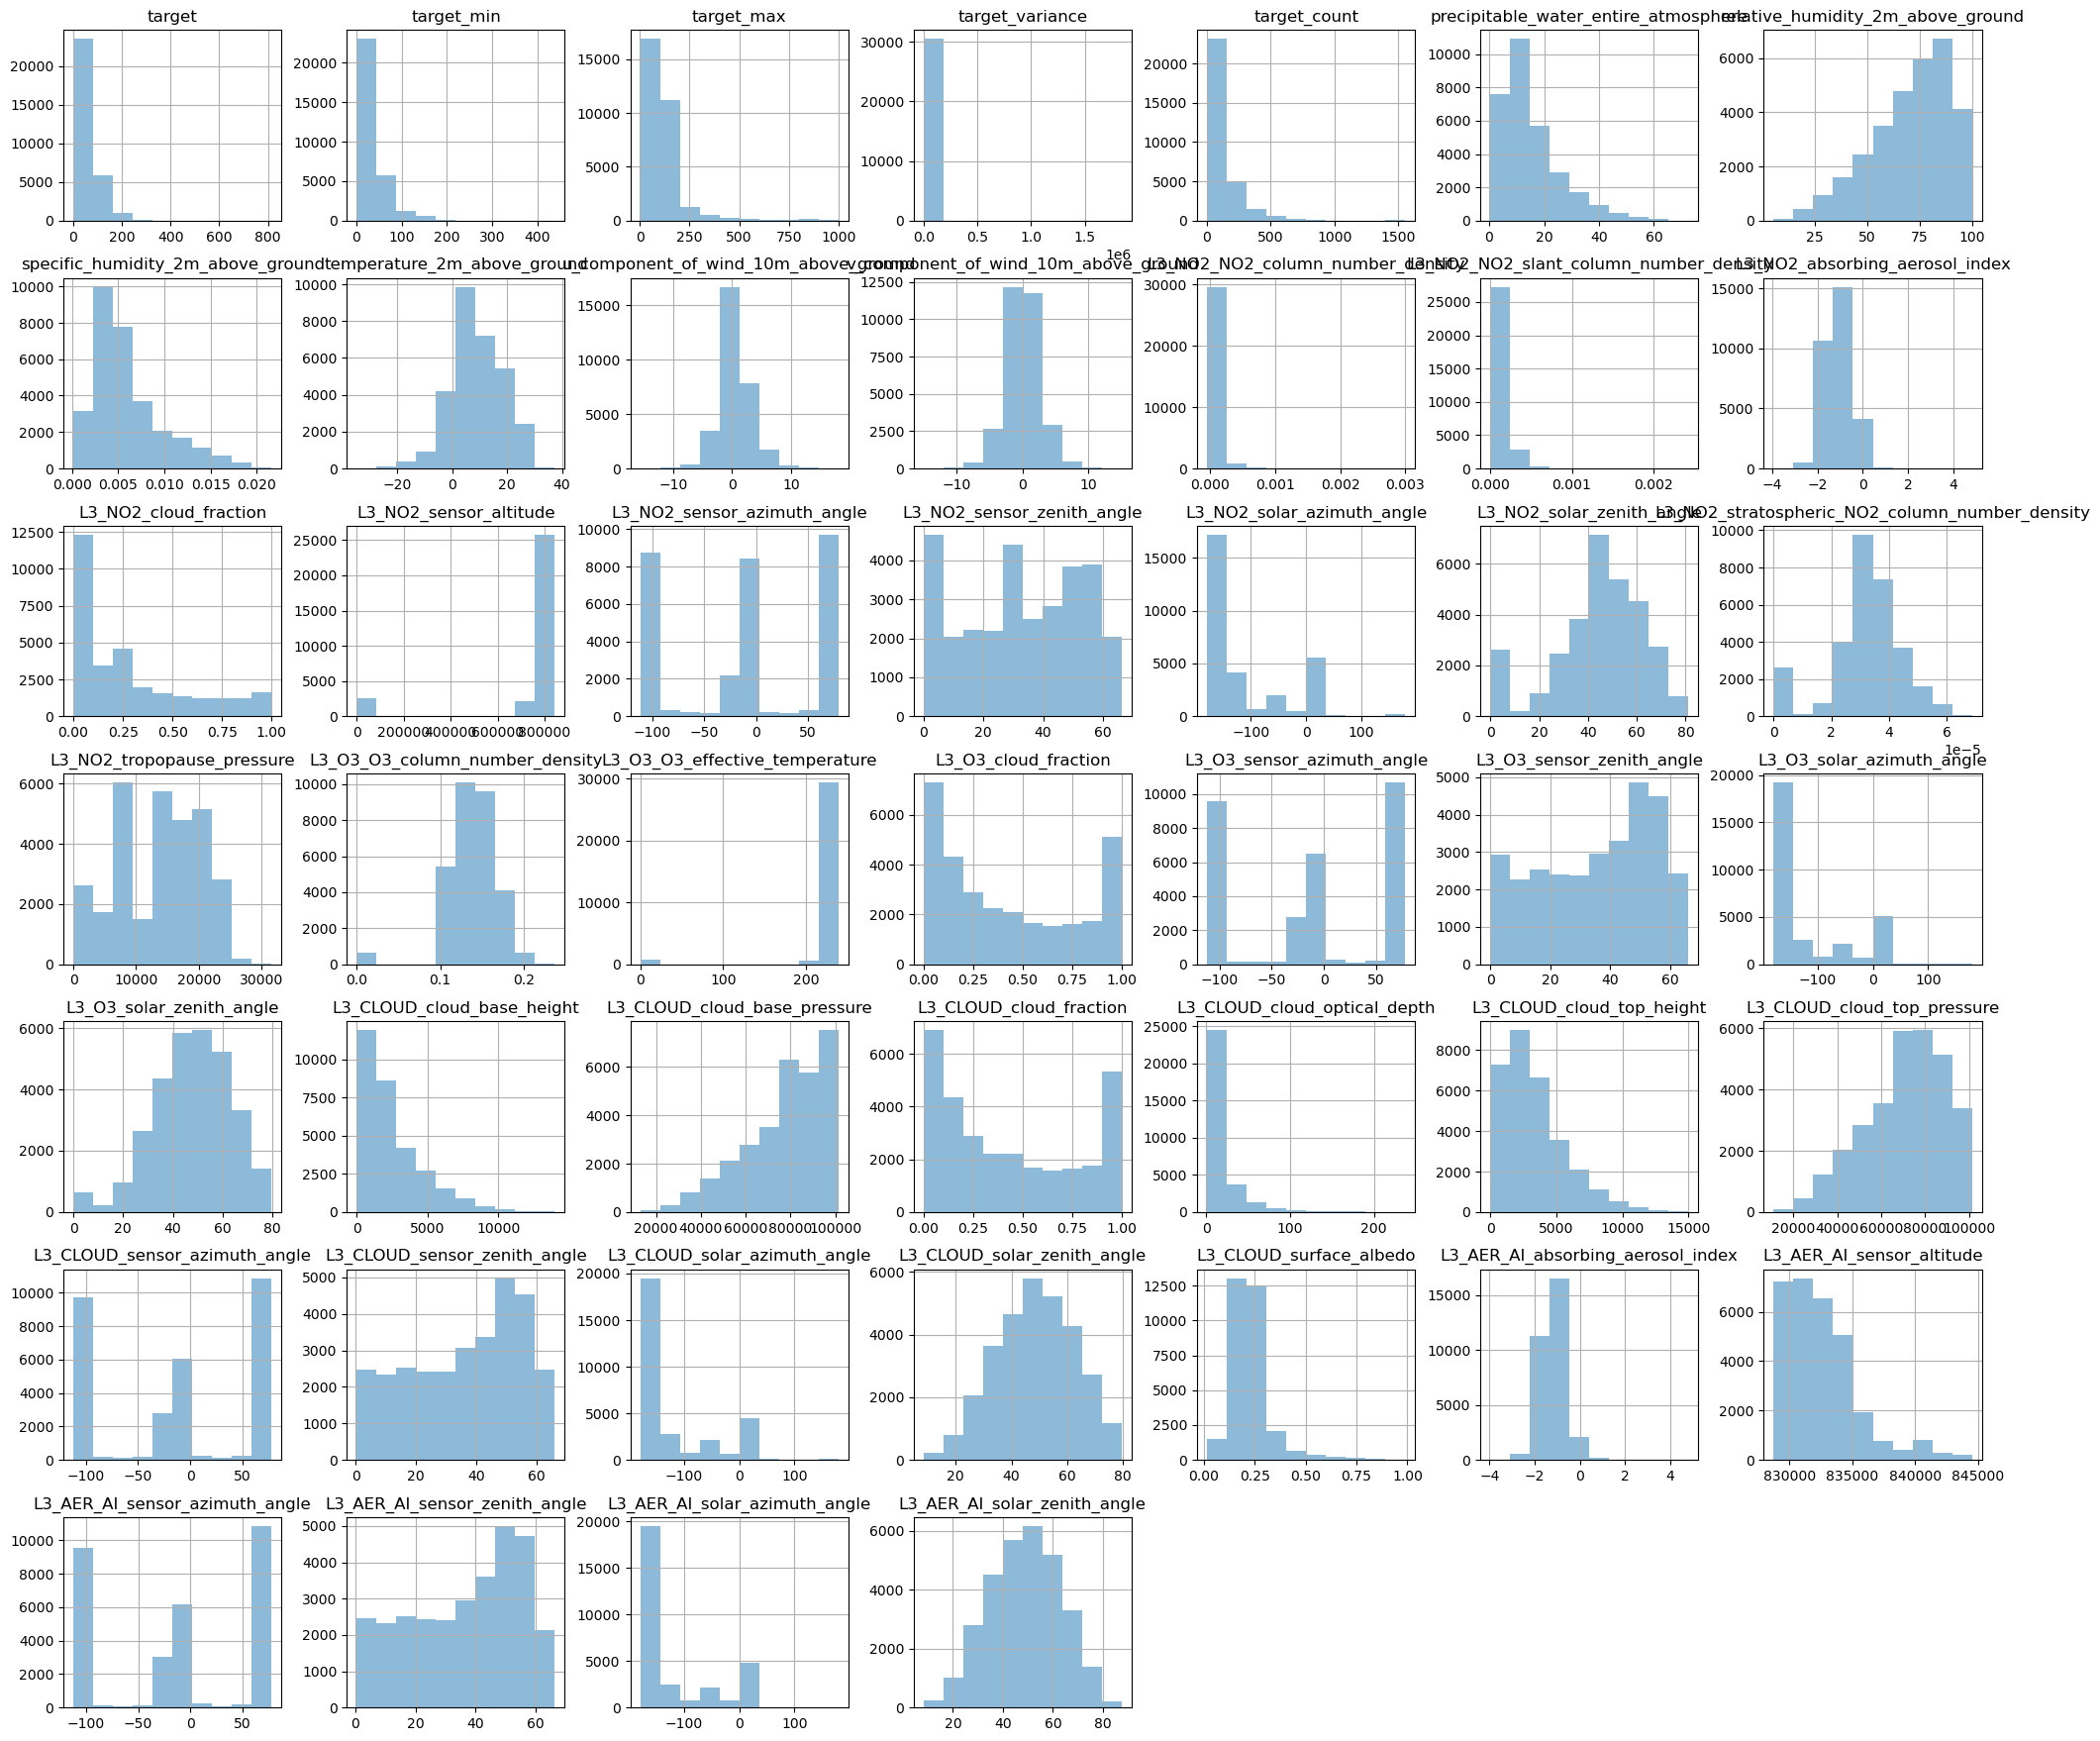

In [19]:
df_train.select_dtypes(include=['number']).hist(alpha=0.5, figsize=(25, 22))
plt.show()

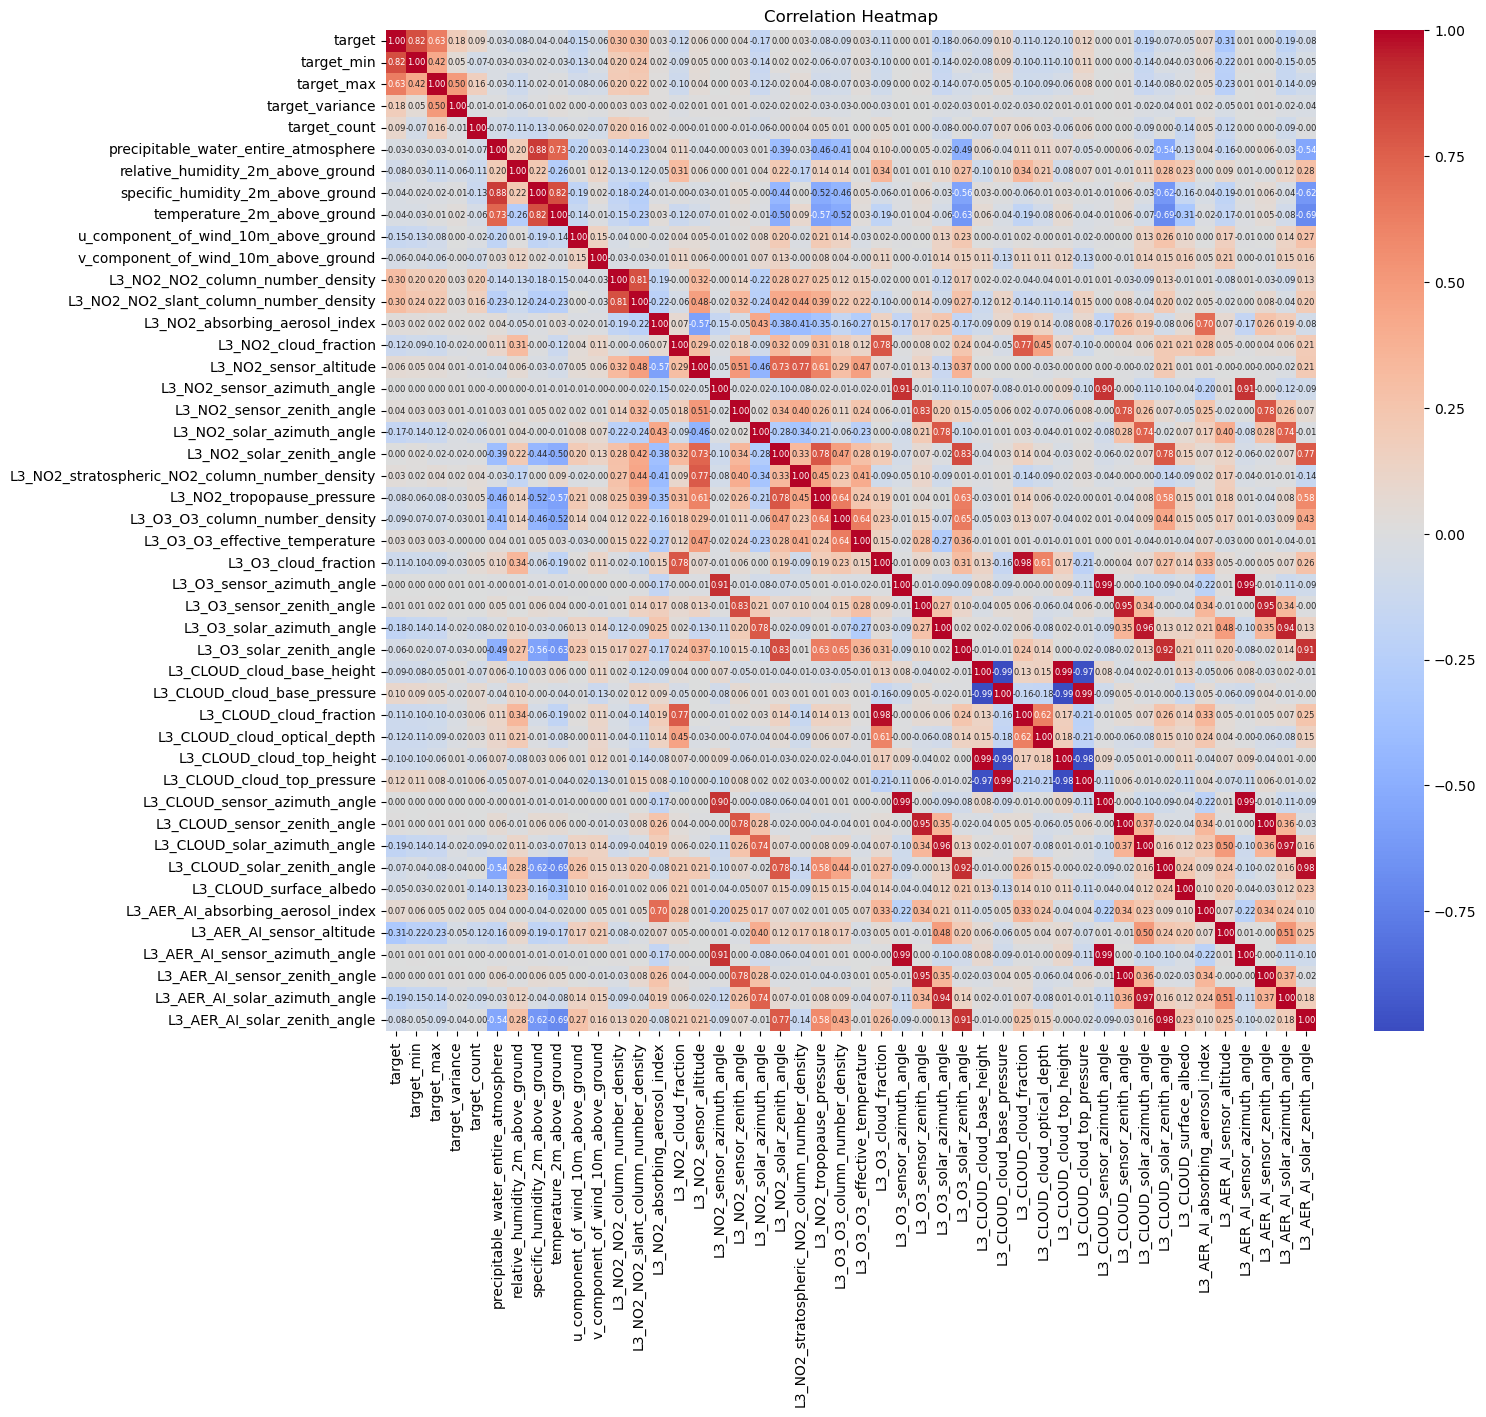

In [20]:
# Calculate the correlation matrix
correlation_matrix = df_train.select_dtypes(include=['number']).corr()

# Create a heatmap
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 6})
plt.title('Correlation Heatmap')
plt.show()

In [21]:
#columns to drop which are not in test set and not needed for modeling
drop_columns = ['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min', 'target_max', 'target_variance', 'target_count']

## Separating X and y

In [22]:
# Splitting the data into features (X) and target variable (y)
X = df_train.drop(drop_columns, axis=1)
y = df_train['target']

In [23]:
# saving the features used for training the model, to be used for the test dataset
features_used_for_training = list(X.columns)
features_used_for_training

['precipitable_water_entire_atmosphere',
 'relative_humidity_2m_above_ground',
 'specific_humidity_2m_above_ground',
 'temperature_2m_above_ground',
 'u_component_of_wind_10m_above_ground',
 'v_component_of_wind_10m_above_ground',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_azimuth_angle',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_stratospheric_NO2_column_number_density',
 'L3_NO2_tropopause_pressure',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_azimuth_angle',
 'L3_O3_sensor_zenith_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_O3_solar_zenith_angle',
 'L3_CLOUD_cloud_base_height',
 'L3_CLOUD_cloud_base_pressure',
 'L3_CLOUD_cloud_fraction',
 'L3_CLOUD_cloud_optical_depth',
 'L3_CLOUD_cloud_top_height',
 'L3_CLOUD_cloud_top_pres

In [24]:
X.shape

(30557, 41)

### Scale X features

In [25]:
# Initialize StandardScaler from sklearn
scaler = StandardScaler()

In [26]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
X.head()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,...,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle
0,-0.402523,-0.550456,0.537511,0.984205,0.583280,-0.498085,-0.225515,-0.072243,-0.233326,-0.932990,...,0.113291,0.855125,-1.873476,0.000000,-0.130665,2.625133,1.242401,0.107450,0.834703,-1.852070
1,-0.065709,-1.156595,0.629929,1.415508,1.075924,-0.483214,-0.201152,0.320307,0.019414,-0.892257,...,1.262906,0.767990,-1.426837,0.890551,0.146586,2.818198,-0.050374,1.253936,0.747653,-1.413053
2,0.102698,-1.975414,0.394925,1.895489,1.716741,1.291532,-0.305415,0.067364,0.157545,-0.900698,...,0.728041,0.611799,-1.020850,0.810709,0.298113,3.036878,-1.332490,0.719479,0.592032,-1.014345
3,-0.784999,-2.618771,-0.553014,1.568062,0.955379,0.382675,-0.128701,0.109839,0.538452,-0.763719,...,-0.401161,0.677010,-1.288894,0.530896,0.715950,2.931452,-1.320202,-0.408879,0.657005,-1.277587
4,-0.131201,-1.374592,-0.172783,0.802195,0.814234,0.977362,-0.263631,-0.208709,2.480748,-0.857311,...,-1.952645,0.754511,-1.549380,0.114621,2.846614,2.814809,0.991805,-1.959166,0.734224,-1.533399


In [106]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Initialize LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True)

In [42]:
# Fit LazyRegressor on the training data
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 41/42 [45:12<00:36, 36.21s/it]   

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10455
[LightGBM] [Info] Number of data points in the train set: 24445, number of used features: 41
[LightGBM] [Info] Start training from score 61.188992


100%|██████████| 42/42 [45:17<00:00, 64.69s/it]


In [43]:
# Print the summary of model performance
print(models)

                               Adjusted R-Squared      R-Squared       RMSE  \
Model                                                                         
ExtraTreesRegressor                          0.59           0.59      30.03   
RandomForestRegressor                        0.55           0.55      31.53   
HistGradientBoostingRegressor                0.54           0.54      31.83   
XGBRegressor                                 0.54           0.54      31.83   
LGBMRegressor                                0.53           0.53      32.03   
BaggingRegressor                             0.50           0.50      33.15   
MLPRegressor                                 0.46           0.47      34.21   
GradientBoostingRegressor                    0.42           0.42      35.73   
KNeighborsRegressor                          0.41           0.42      35.86   
NuSVR                                        0.28           0.28      39.69   
RidgeCV                                      0.27   

In [ ]:
# Create a list of regressor models
regressor_models = [
    ("Linear Regression", LinearRegression()),
    ("Lasso Regression", Lasso()),
    ("Ridge Regression", Ridge()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("AdaBoost", AdaBoostRegressor()),
    ("XGBoost", xgb.XGBRegressor())
]

In [ ]:
# Loop through each model
for model_name, model in regressor_models:
    print(f"Fitting {model_name}...")
    # Fit the model
    model.fit(X_train, y_train)
    print(f"Model {model_name} fitted.")

    # Display 5 rows of predictions
    predictions = model.predict(X_test)
    print(f"\nPredictions for {model_name}:")
    print(pd.DataFrame({'Actual': y_test[:5], 'Predicted': predictions[:5]}))

    # Calculate RMSE
    rmse = np.sqrt(MSE(y_test, predictions))
    print(f"\nRMSE for {model_name}: {rmse}\n")

Fitting Linear Regression...
Model Linear Regression fitted.

Predictions for Linear Regression:
       Actual  Predicted
24141   79.00      54.58
26865  129.00      87.01
22772   72.00      64.70
25624   34.00      89.17
21690   61.00      54.94

RMSE for Linear Regression: 40.03525592938686

Fitting Lasso Regression...
Model Lasso Regression fitted.

Predictions for Lasso Regression:
       Actual  Predicted
24141   79.00      61.78
26865  129.00      84.42
22772   72.00      57.30
25624   34.00      85.30
21690   61.00      63.04

RMSE for Lasso Regression: 40.670651907188294

Fitting Ridge Regression...
Model Ridge Regression fitted.

Predictions for Ridge Regression:
       Actual  Predicted
24141   79.00      53.68
26865  129.00      87.14
22772   72.00      63.95
25624   34.00      88.09
21690   61.00      54.52

RMSE for Ridge Regression: 40.059085019973345

Fitting Decision Tree...
Model Decision Tree fitted.

Predictions for Decision Tree:
       Actual  Predicted
24141   79.

### Choosing XGboost as model

In [28]:
#rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
XGBoost = xgb.XGBRegressor() #n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42

In [29]:
# Fitting the model
XGBoost.fit(X_train,y_train)
# Predictions
XGBoost_predict = XGBoost.predict(X_test)

In [ ]:
# evaluate one or more ML models
xgb_Model = pd.DataFrame({'target': y_test, 'Predicted': XGBoost_predict})
xgb_Model.head()

,target,Predicted
18531,117.0,139.025406
13620,53.0,85.731987
11488,152.0,85.002831
2201,67.0,44.871754
8510,29.0,46.881069


In [30]:
# Calculate RMSE
rmse = np.sqrt(MSE(y_test, XGBoost_predict))
rmse

31.767410000310324

### Choosing RandomForestRegressor as the model

In [107]:
# Instantiate and fit the model
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [108]:
# RandomForestRegressor predictions
rf_predictions = rf_regressor.predict(X_test)
rf_Model = pd.DataFrame({'target': y_test, 'Predicted': rf_predictions})
print(rf_Model.head())
# Evaluate the model
rmse_rf = np.sqrt(MSE(y_test, rf_predictions))
print()
print(rmse_rf)

       target  Predicted
24141    79.0     22.790
26865   129.0     72.180
22772    72.0     48.660
25624    34.0     62.490
21690    61.0     62.806

45.57161865969211


In [109]:
# Extract feature importances
feature_importances = rf_regressor.feature_importances_

# Sort features by importance (descending order)
sorted_idx = feature_importances.argsort()[::-1]  # Descending order of importance

# Extract column names and importances
important_features = X.columns[sorted_idx]
feature_importances_sorted = feature_importances[sorted_idx]

# Print results (optional)
print("Important Features (by Importance):")
for feature, importance in zip(important_features, feature_importances_sorted):
    print(f"{feature}: {importance:.4f}")


Important Features (by Importance):
temperature_2m_above_ground: 0.2705
relative_humidity_2m_above_ground: 0.2485
precipitable_water_entire_atmosphere: 0.2475
specific_humidity_2m_above_ground: 0.2334


In [110]:
top_n = 10
selected_features = important_features[:top_n]
selected_features

Index(['temperature_2m_above_ground', 'relative_humidity_2m_above_ground',
       'precipitable_water_entire_atmosphere',
       'specific_humidity_2m_above_ground'],
      dtype='object')

In [111]:
# Select the top 9 features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [112]:
rf_regressor.fit(X_train_selected, y_train)
# RandomForestRegressor predictions
rf_predictions = rf_regressor.predict(X_test_selected)
rf_Model = pd.DataFrame({'target': y_test, 'Predicted': rf_predictions})
print(rf_Model.head())
# Evaluate the model
rmse_rf = np.sqrt(MSE(y_test, rf_predictions))
print()
print(rmse_rf)

       target  Predicted
24141    79.0     24.350
26865   129.0     74.490
22772    72.0     50.750
25624    34.0     68.690
21690    61.0     64.366

45.580952286229554


In [113]:
from sklearn.ensemble import StackingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import Ridge


# Initialize the base models
base_models = [
    ('extratrees', ExtraTreesRegressor(random_state=42)),
    ('randomforest', RandomForestRegressor(random_state=42)),
    ('histgradientboosting', HistGradientBoostingRegressor(random_state=42))
]

# Initialize the meta-model
meta_model = Ridge()

# Initialize the StackingRegressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, n_jobs=-1)

# Fit the model
stacking_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_regressor.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 44.570140634625716


In [97]:
features = X_train.columns

### Use ExtraTreesRegressor as the Best Model

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the ExtraTreesRegressor with default parameters
etr = ExtraTreesRegressor(random_state=42)

# Fit the model to the training data
etr.fit(X_train, y_train)

# Predict on the test set
y_pred = etr.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 30.05757240275554


In [ ]:
# let's use the RandomizedSearchCV
#from sklearn.model_selection import RandomizedSearchCV
# define the correct parameter grid
#params = {
    #'max_depth': [None, 10, 20, 30, 50],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2', None],
    #'bootstrap': [False, True],
    #'criterion': ['squared_error'],
    #'oob_score': [False, True],
    #'warm_start': [False, True]
#}
# Instantiate and fit the RandomizedSearchCV
#random_search = RandomizedSearchCV(estimator=etr, param_distributions=params, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42, verbose=2)
#random_search.fit(X_train, y_train)

#print("Best parameters found: ", random_search.best_params_)

# Predict on the test set using the best estimator
#best_etr = random_search.best_estimator_
#y_predict = best_etr.predict(X_test)

#rmse = mean_squared_error(y_test, y_pred, squared=False)
#print(f"Root Mean Squared Error: {rmse}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


## Submitting the test data predictions to Zindi

In [98]:
# preprocess the test dataset for model prediction
# remember it was imported earlier in this notebook.
# But let us import it again
# Load Test dataset
df_test = pd.read_csv('Test.csv')
test_data = df_test[features]
test_data.head()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground
0,11.600000,30.200001,0.00409,14.656824
1,18.300001,42.900002,0.00595,15.026544
2,17.600000,41.299999,0.00590,15.511041
3,15.011948,53.100002,0.00709,14.441858
4,9.700000,71.599998,0.00808,11.896295


In [99]:
# Fill missing values in numerical columns with their mean values
numerical_columns = test_data.select_dtypes(include=['number']).columns
for col in numerical_columns:
    col_mean = test_data[col].mean()
    test_data[col].fillna(col_mean, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_2580\335263117.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[col].fillna(col_mean, inplace=True)


In [100]:
test_data.isnull().sum()

precipitable_water_entire_atmosphere    0
relative_humidity_2m_above_ground       0
specific_humidity_2m_above_ground       0
temperature_2m_above_ground             0
dtype: int64

In [101]:
test_data.describe()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground
count,16136.000000,16136.000000,16136.000000,16136.000000
mean,14.202076,71.136312,0.005513,8.651834
std,9.377060,18.357542,0.003261,8.033144
min,0.900000,6.700000,0.000279,-26.628958
25%,7.655303,60.000000,0.003401,3.201305
50%,11.600000,74.800003,0.004610,7.482545
75%,18.100000,85.500000,0.006598,13.834132
max,63.100002,100.000000,0.020180,34.851022


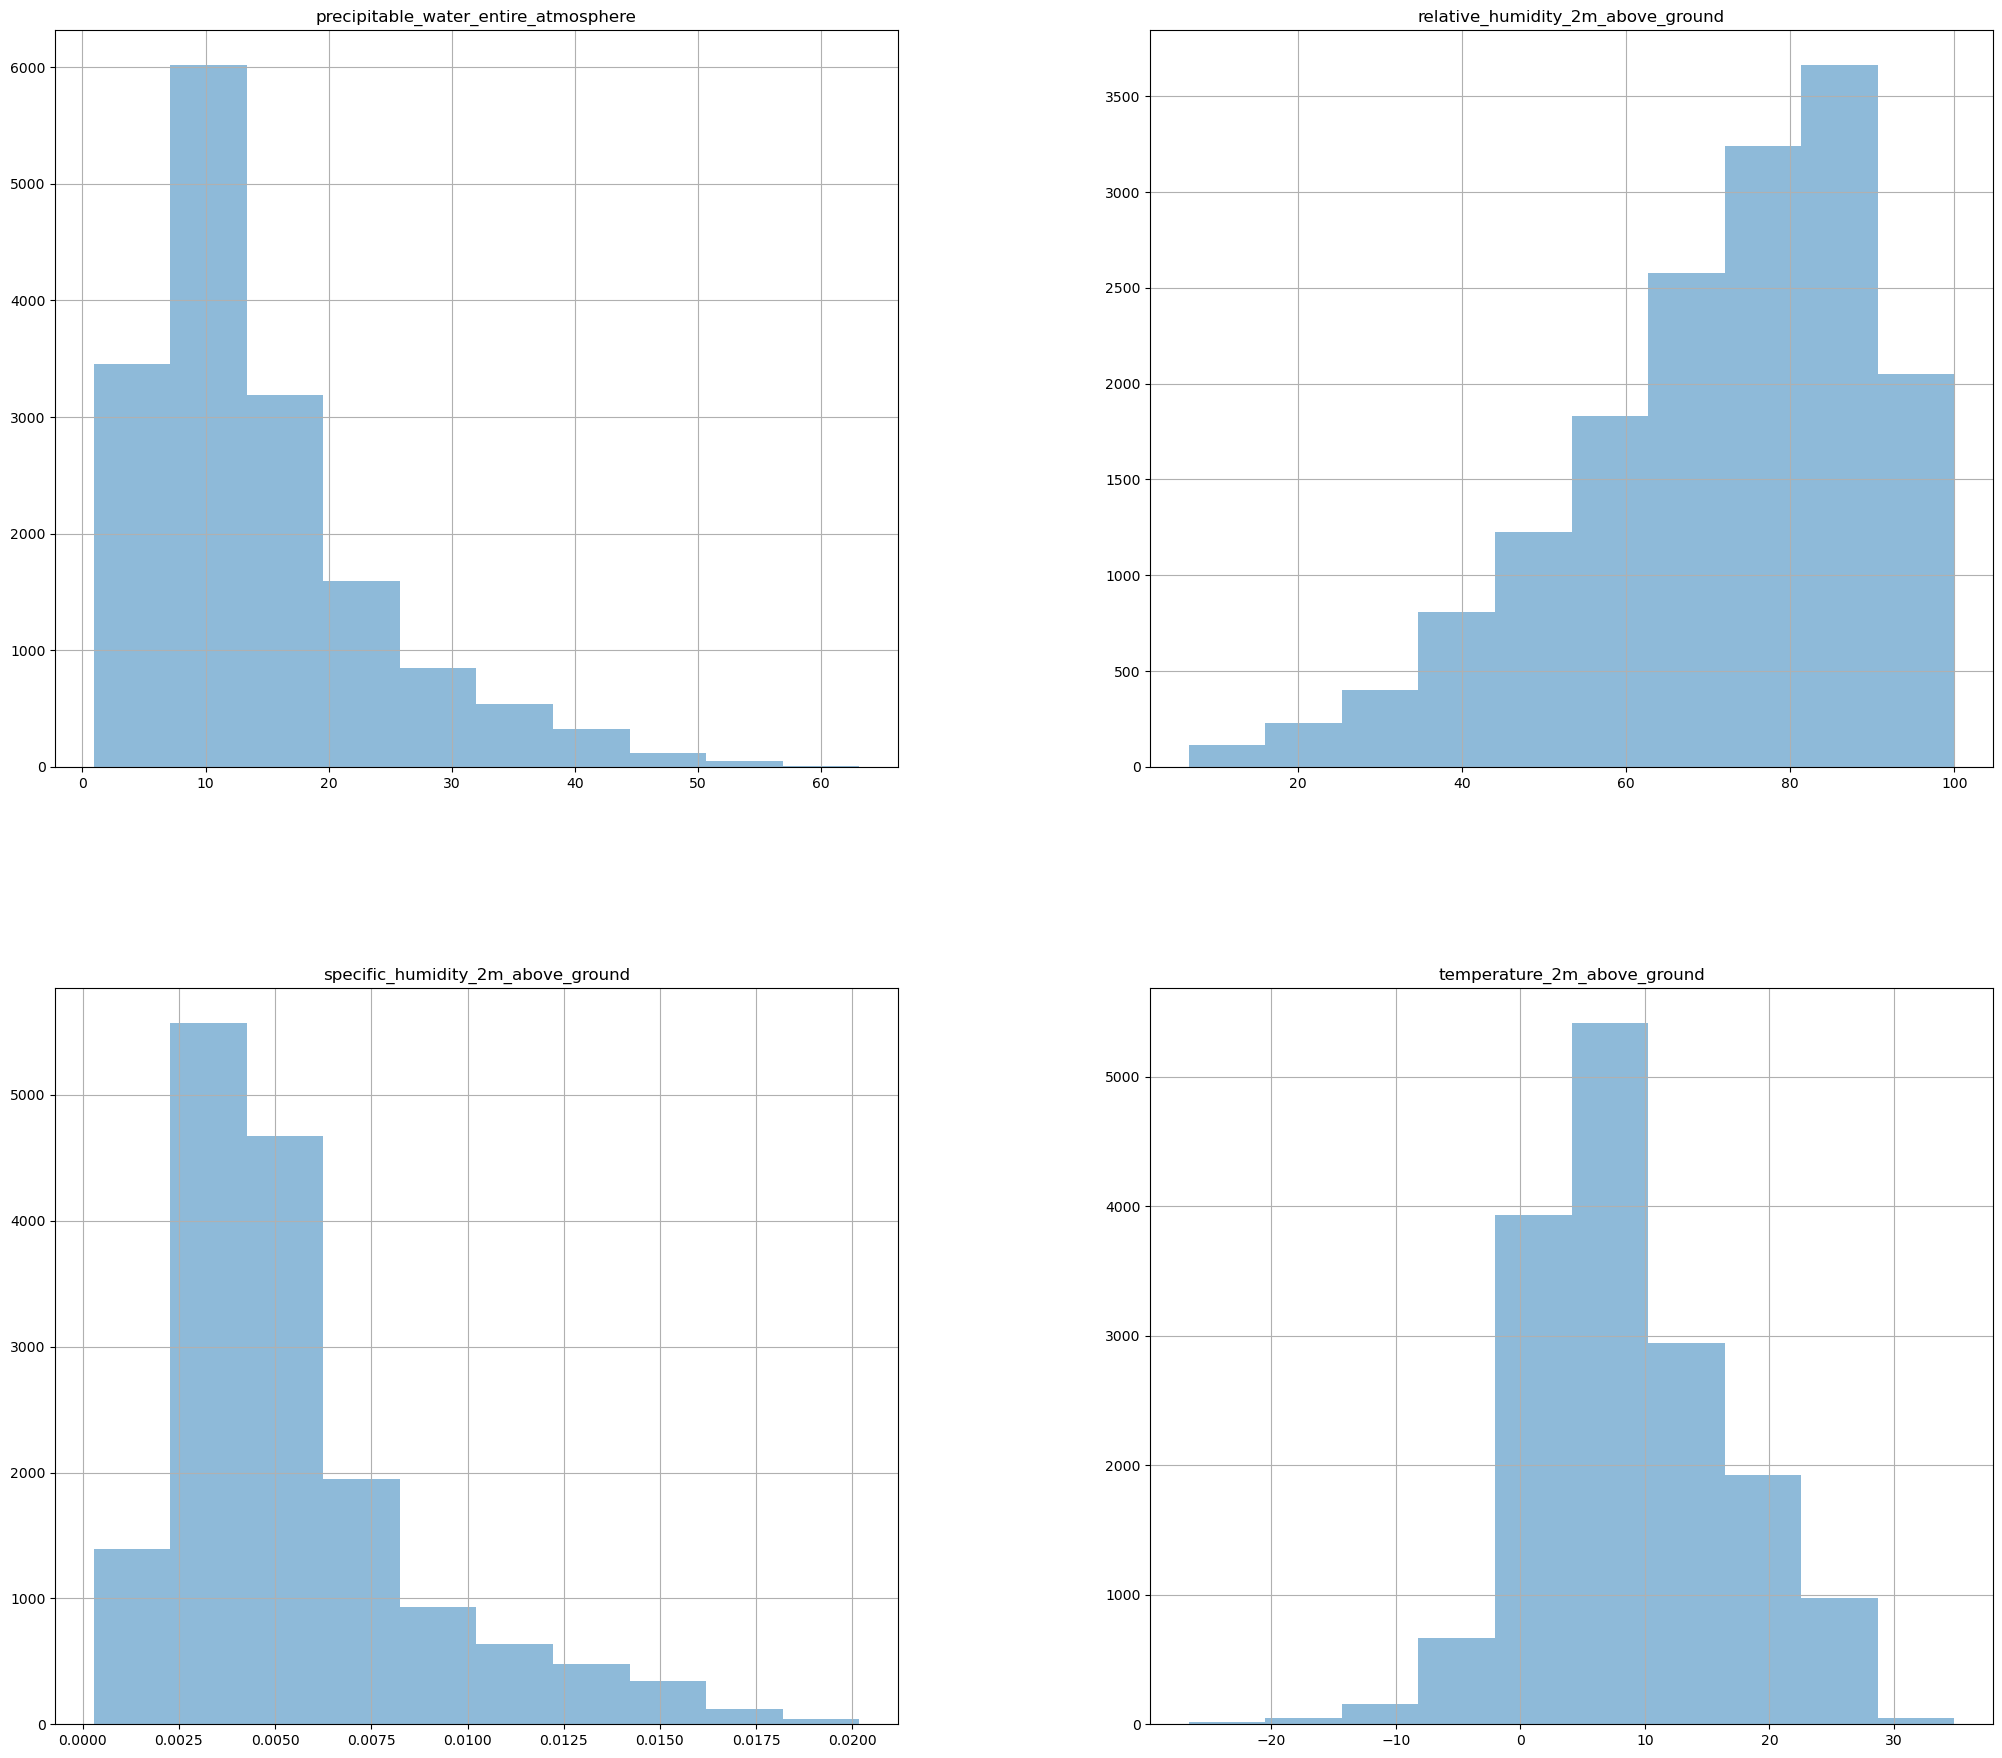

In [102]:
test_data.select_dtypes(include=['number']).hist(alpha=0.5, figsize=(25, 22))
plt.show()

In [103]:
#the 'place_id x date' is needed for the submission file
place_date = df_test['Place_ID X Date']
place_date

0        0OS9LVX X 2020-01-02
1        0OS9LVX X 2020-01-03
2        0OS9LVX X 2020-01-04
3        0OS9LVX X 2020-01-05
4        0OS9LVX X 2020-01-06
                 ...         
16131    ZZDJZMS X 2020-03-31
16132    ZZDJZMS X 2020-04-01
16133    ZZDJZMS X 2020-04-02
16134    ZZDJZMS X 2020-04-03
16135    ZZDJZMS X 2020-04-04
Name: Place_ID X Date, Length: 16136, dtype: object

In [104]:
test_data.shape

(16136, 4)

In [105]:
# add the predicted values to the test set
test_data['target'] = stacking_regressor.predict(test_data)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- L3_AER_AI_absorbing_aerosol_index
- L3_AER_AI_sensor_altitude
- L3_AER_AI_sensor_azimuth_angle
- L3_AER_AI_sensor_zenith_angle
- L3_AER_AI_solar_azimuth_angle
- ...


In [78]:
# add the 'place_id x date' to the test set
test_data['Place_ID X Date'] = place_date

# select only the 'place_id x date' and predicted 'target', creating a new dataset
load = test_data[['Place_ID X Date','target']]
load.to_csv('predicted_target.csv', index = False)
load.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_2580\422103589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Place_ID X Date'] = place_date


,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,52.03
1,0OS9LVX X 2020-01-03,52.24
2,0OS9LVX X 2020-01-04,51.01
3,0OS9LVX X 2020-01-05,53.49
4,0OS9LVX X 2020-01-06,53.16


## Saving our model for deployment on streamlit

## Building a model with only four features to be used for streamlit testing

In [79]:
# create a model that accepts only four features
features = ['precipitable_water_entire_atmosphere', 'relative_humidity_2m_above_ground',
            'specific_humidity_2m_above_ground', 'temperature_2m_above_ground']

In [80]:
# Splitting the data into features (X) and target variable (y)
X = df_train[features]
y = df_train['target']

In [81]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
#XGBoost = xgb.XGBRegressor()
rf_reg = RandomForestRegressor()

In [85]:
# Fitting the model with xgboost
#XGBoost.fit(X_train, y_train)


# Fitting the model with random forest
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#import pickle

#model_save_path = "XGBoost_model_four_features.pkl"
#with open(model_save_path,'wb') as file:
    #pickle.dump(XGBoost,file)

In [86]:
import pickle
model_save_path = "random_forest_model_four_features.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(rf_reg,file)

#### You can also save your model with joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Save the model using joblib
#import joblib
#joblib.dump(XGBoost, 'XGBoost_model_four_features.joblib')

['XGBoost_model_four_features.joblib']